In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print('All libray imported')

All libray imported


In [2]:
# load the dataset
df=pd.read_csv('loan_data.csv')

In [3]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
df.shape

(9578, 14)

In [5]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [6]:
# missing value
df.isnull().sum().any()

False

In [7]:
df['not.fully.paid'].value_counts()
# 0- full paid, 1 - not paid
# imbalanced data

0    8045
1    1533
Name: not.fully.paid, dtype: int64

## Exploratory data analysis of different factors of the dataset.

In [8]:
df.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

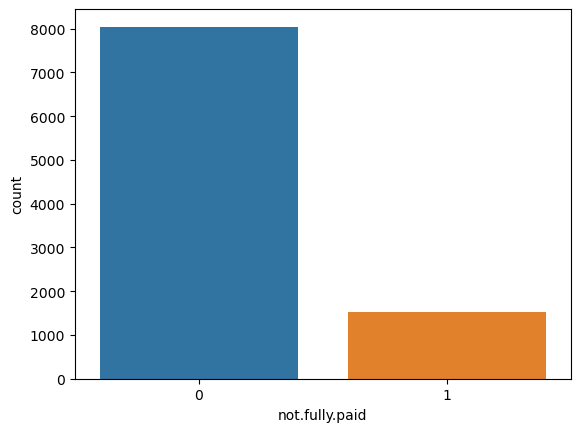

In [9]:
sns.countplot(x=df['not.fully.paid'])
plt.show()

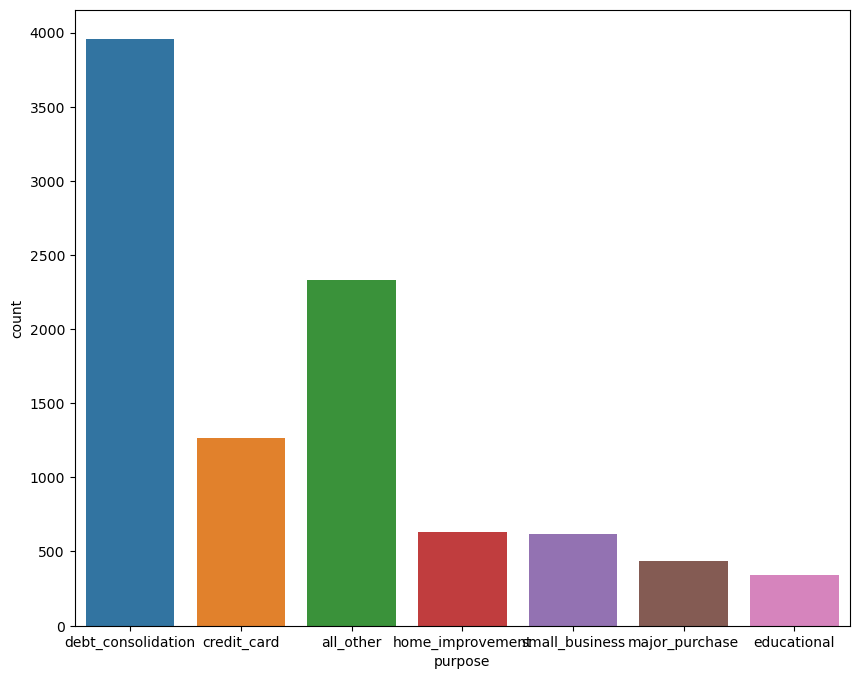

In [10]:
plt.figure(figsize=(10,8))
sns.countplot(x=df['purpose'])
plt.show()

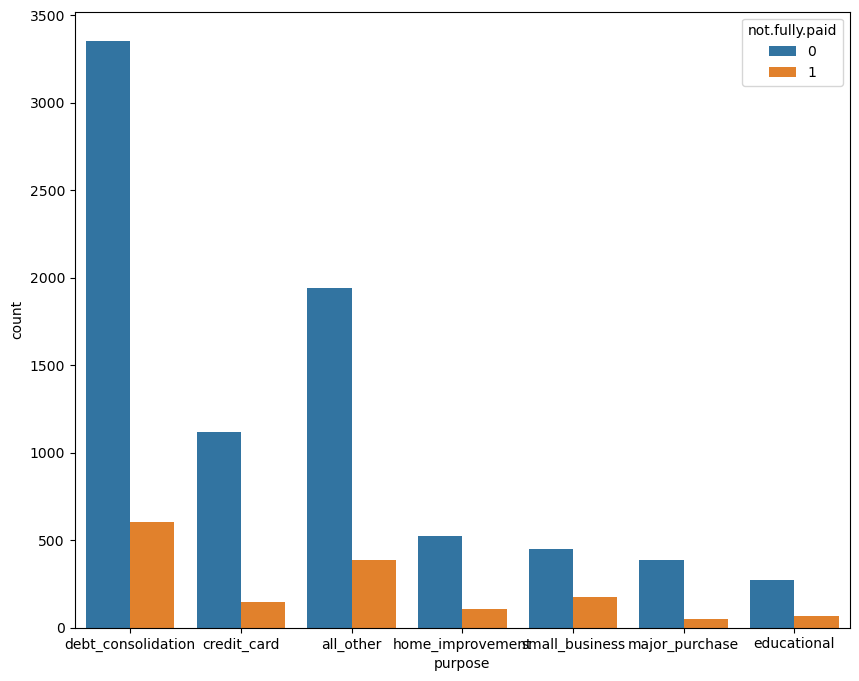

In [11]:
# purpose ---- not fully paid
plt.figure(figsize=(10,8))
sns.countplot(x='purpose',hue='not.fully.paid',data=df)
plt.show()

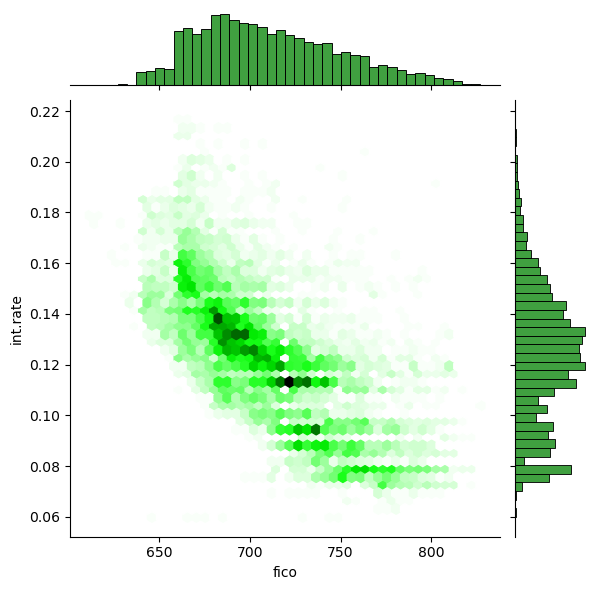

In [12]:
# bi variate analysis
sns.jointplot(x='fico',y='int.rate',data=df,kind='hex',color='g')
plt.show()

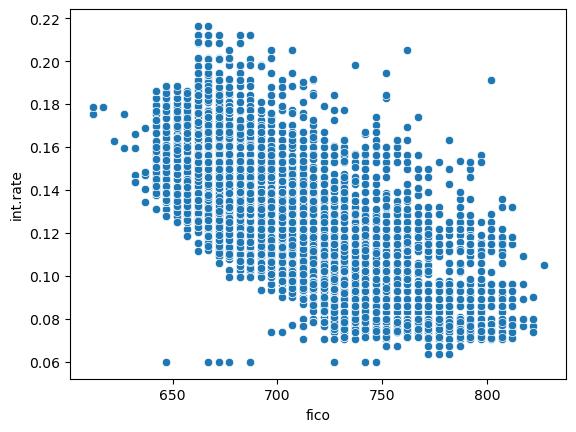

In [13]:
sns.scatterplot(x='fico',y='int.rate',data=df)
plt.show()

<AxesSubplot:xlabel='fico', ylabel='Count'>

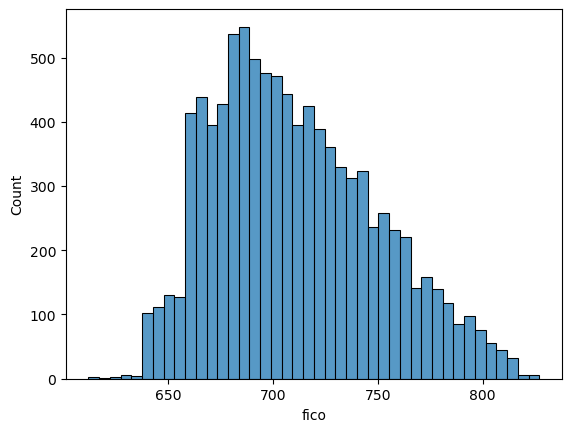

In [14]:
sns.histplot(df['fico'])

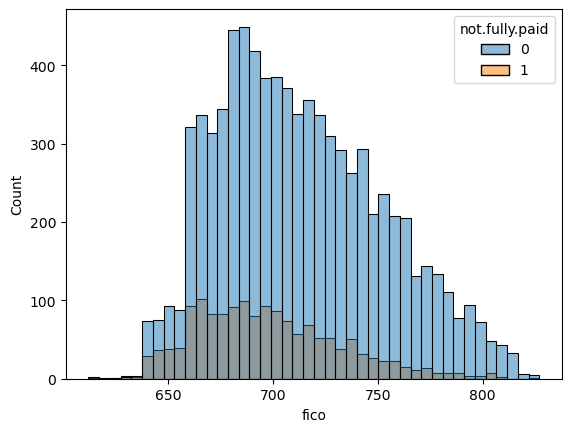

In [15]:
sns.histplot(x='fico',hue='not.fully.paid',data=df)
plt.show()

Feature Transformation

Transform categorical values into numerical values (discrete)

In [16]:
# handle imbalanced dataset
df['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

In [17]:
not_fully_paid_0=df[df['not.fully.paid']==0]
not_fully_paid_1=df[df['not.fully.paid']==1]

In [18]:
not_fully_paid_0.shape

(8045, 14)

In [19]:
not_fully_paid_1.shape

(1533, 14)

In [20]:
# resample
from sklearn.utils import resample
df_minor_upsample=resample(not_fully_paid_1,replace=True,n_samples=8045)


In [21]:
new_df=pd.concat([not_fully_paid_0,df_minor_upsample])

In [22]:
# shuffle
from sklearn.utils import shuffle
new_df=shuffle(new_df)

In [23]:
new_df['not.fully.paid'].value_counts()

1    8045
0    8045
Name: not.fully.paid, dtype: int64

In [24]:
new_df.shape

(16090, 14)

In [25]:
new_df.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [26]:
# convert purpose into num data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [27]:
for i in new_df.columns:
    if new_df[i].dtypes=='object':
        new_df[i]=le.fit_transform(new_df[i])

In [28]:
new_df.dtypes

credit.policy          int64
purpose                int32
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

### Additional Feature Engineering

### You will check the correlation between features and will drop those features which have a strong correlation

### This will help reduce the number of features and will leave you with the most relevant features

In [29]:
new_df.corr()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,1.000000,0.024459,-0.298245,0.063453,0.024243,-0.109981,0.380182,0.092081,-0.176904,-0.095980,-0.544485,-0.057452,-0.063761,-0.200341
purpose,0.024459,1.000000,0.138880,0.195627,0.110032,-0.046789,0.062332,0.053429,0.063725,-0.074381,0.030375,0.008482,0.004993,0.057173
int.rate,-0.298245,0.138880,1.000000,0.277583,0.084566,0.210125,-0.685046,-0.098509,0.084072,0.417325,0.185382,0.145336,0.106720,0.223717
installment,0.063453,0.195627,0.277583,1.000000,0.476356,0.024804,0.100496,0.175514,0.244967,0.058784,-0.026293,0.002339,-0.023491,0.058006
log.annual.inc,0.024243,0.110032,0.084566,0.476356,1.000000,-0.021672,0.097908,0.344387,0.380444,0.082405,0.032975,0.021098,0.020934,-0.048808
dti,-0.109981,-0.046789,0.210125,0.024804,-0.021672,1.000000,-0.228490,0.100210,0.177609,0.331282,0.028443,-0.034336,0.017593,0.054353
fico,0.380182,0.062332,-0.685046,0.100496,0.097908,-0.228490,1.000000,0.241331,-0.001074,-0.500774,-0.194479,-0.202322,-0.159679,-0.217515
days.with.cr.line,0.092081,0.053429,-0.098509,0.175514,0.344387,0.100210,0.241331,1.000000,0.251000,0.030540,-0.032441,0.082715,0.070654,-0.048128
revol.bal,-0.176904,0.063725,0.084072,0.244967,0.380444,0.177609,-0.001074,0.251000,1.000000,0.177596,0.014922,-0.029175,-0.029542,0.051471
revol.util,-0.095980,-0.074381,0.417325,0.058784,0.082405,0.331282,-0.500774,0.030540,0.177596,1.000000,-0.029775,-0.047669,0.081402,0.114736


<AxesSubplot:>

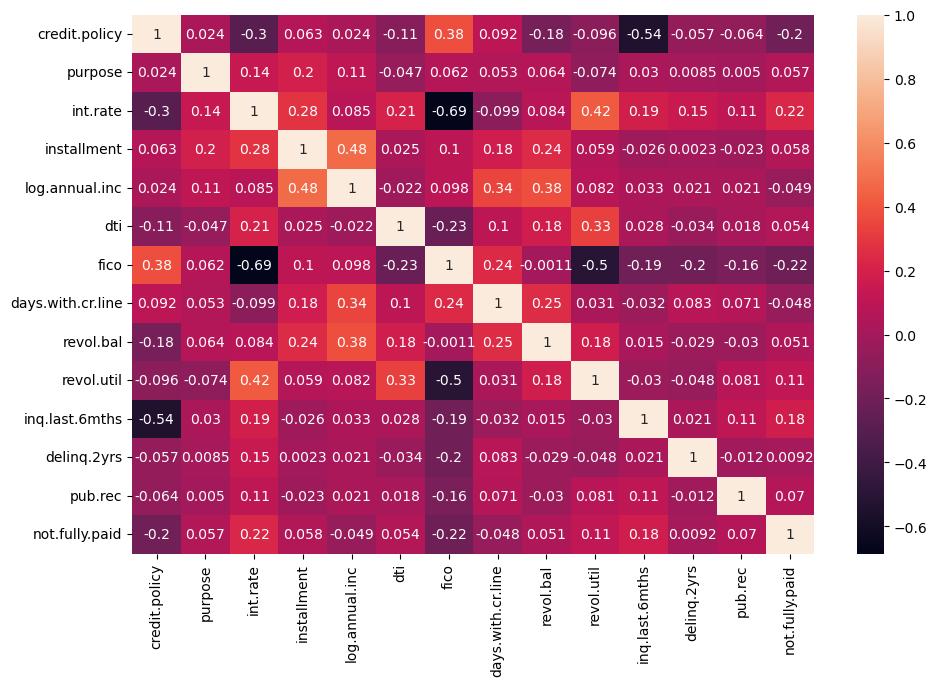

In [30]:
plt.figure(figsize=(11,7))
sns.heatmap(new_df.corr(),annot=True)

In [31]:
# see the sorted results
new_df.corr().abs()['not.fully.paid'].sort_values(ascending=False)

not.fully.paid       1.000000
int.rate             0.223717
fico                 0.217515
credit.policy        0.200341
inq.last.6mths       0.178043
revol.util           0.114736
pub.rec              0.070246
installment          0.058006
purpose              0.057173
dti                  0.054353
revol.bal            0.051471
log.annual.inc       0.048808
days.with.cr.line    0.048128
delinq.2yrs          0.009208
Name: not.fully.paid, dtype: float64

In [32]:
new_df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [33]:
# take columns
X=new_df[['credit.policy','purpose', 'int.rate', 'installment','fico','revol.bal','revol.util','inq.last.6mths','pub.rec']]

In [34]:
X.shape

(16090, 9)

In [35]:
y=new_df['not.fully.paid']

In [36]:
# Create train set & test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

In [37]:
X_train.shape

(12872, 9)

In [38]:
X_test.shape

(3218, 9)

In [39]:
X_train

,credit.policy,purpose,int.rate,installment,fico,revol.bal,revol.util,inq.last.6mths,pub.rec
417,1,2,0.0920,382.72,747,3179,11.0,1,1
2834,1,0,0.0737,543.30,762,3524,8.7,2,0
8162,0,2,0.1299,203.82,692,22191,85.3,6,1
5085,1,0,0.0774,280.97,787,2525,7.3,0,0
2087,1,2,0.1347,644.53,762,7888,7.5,1,0
...,...,...,...,...,...,...,...,...,...
1151,1,0,0.0976,64.31,712,29889,37.4,1,0
8629,0,0,0.1134,230.30,677,12965,96.8,4,0
1426,1,6,0.1462,517.20,667,13706,45.7,1,0
4528,1,2,0.1461,330.97,672,10565,80.7,0,0


In [40]:
# Apply scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [41]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## Create a deep learning model using Keras with Tensorflow backend

In [42]:
pip install tensorflow

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [44]:
# create the architecture
# 2 ANN layer
model=Sequential()
model.add(Dense(19,activation='relu',input_shape=[9]))
model.add(Dropout(0.20))


model.add(Dense(10,activation='relu'))
model.add(Dropout(0.20))

# output layer
model.add(Dense(1,activation='sigmoid'))

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 19)                190       
                                                                 
 dropout (Dropout)           (None, 19)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                200       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [46]:
# compile the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

early_stop=EarlyStopping(monitor='val_loss',min_delta=0.001,mode='min',patience=10,verbose=1)

In [47]:
model.fit(X_train,y_train,
          epochs=50,
          batch_size=256,
          validation_data=(X_test,y_test),
          callbacks=[early_stop])

NameError: name 'early_stop' is not defined

In [48]:
history=model.fit(X_train,y_train,
          epochs=50,
          batch_size=256,
          validation_data=(X_test,y_test))

Epoch 1/50
51/51 [==============================] - 15s 27ms/step - loss: 0.6789 - accuracy: 0.5639 - val_loss: 0.6702 - val_accuracy: 0.5886
Epoch 2/50
51/51 [==============================] - 0s 8ms/step - loss: 0.6667 - accuracy: 0.5949 - val_loss: 0.6629 - val_accuracy: 0.5954
Epoch 3/50
51/51 [==============================] - 0s 7ms/step - loss: 0.6597 - accuracy: 0.5999 - val_loss: 0.6584 - val_accuracy: 0.6063
Epoch 4/50
51/51 [==============================] - 0s 6ms/step - loss: 0.6564 - accuracy: 0.6041 - val_loss: 0.6560 - val_accuracy: 0.6060
Epoch 5/50
51/51 [==============================] - 0s 5ms/step - loss: 0.6570 - accuracy: 0.6050 - val_loss: 0.6550 - val_accuracy: 0.6078
Epoch 6/50
51/51 [==============================] - 0s 5ms/step - loss: 0.6518 - accuracy: 0.6129 - val_loss: 0.6541 - val_accuracy: 0.6060
Epoch 7/50
51/51 [==============================] - 0s 6ms/step - loss: 0.6536 - accuracy: 0.6090 - val_loss: 0.6535 - val_accuracy: 0.6063
Epoch 8/50
51/51 [

In [49]:
model.evaluate(X_test,y_test)

101/101 [==============================] - 0s 2ms/step - loss: 0.6478 - accuracy: 0.6206


[0.6477526426315308, 0.6205717921257019]

In [50]:
y_pred=model.predict(X_test)

101/101 [==============================] - 0s 2ms/step


In [51]:
y_pred

array([[0.46661887],
       [0.32645226],
       [0.53436106],
       ...,
       [0.5981303 ],
       [0.5585529 ],
       [0.25368193]], dtype=float32)

In [52]:
predictions=(y_pred>0.5).astype('int')

In [53]:
predictions

array([[0],
       [0],
       [1],
       ...,
       [1],
       [1],
       [0]])

In [54]:
y_test

4485    0
4765    0
811     0
8674    1
3122    1
       ..
2860    1
8070    1
7934    1
9209    1
5764    0
Name: not.fully.paid, Length: 3218, dtype: int64

In [55]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(predictions,y_test)

0.6205717837165942

In [56]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.61      0.63      0.62      1563
           1       0.64      0.61      0.62      1655

    accuracy                           0.62      3218
   macro avg       0.62      0.62      0.62      3218
weighted avg       0.62      0.62      0.62      3218



In [57]:
model.save('loan_default1.h5')

## Model2 Architecture


In [58]:
# batch Normalization
from tensorflow.keras.layers import BatchNormalization

In [59]:
# create the architecture model2
# First ANN layer
model1=Sequential()
model1.add(Dense(128,activation='relu',input_shape=[9]))
model1.add(BatchNormalization())
model1.add(Dropout(0.20))

# Second ANN layer
model1.add(Dense(64,activation='tanh'))
model1.add(BatchNormalization())
model1.add(Dropout(0.20))
           

# third ANN layer
model1.add(Dense(32,activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.20))

# output layer
model1.add(Dense(1,activation='sigmoid'))

In [60]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               1280      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 64)               

In [61]:
# compile the model
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [62]:
history=model1.fit(X_train,y_train,
          epochs=100,
          batch_size=256,
          validation_data=(X_test,y_test))

Epoch 1/100
51/51 [==============================] - 13s 34ms/step - loss: 0.7546 - accuracy: 0.5706 - val_loss: 0.6588 - val_accuracy: 0.6109
Epoch 2/100
51/51 [==============================] - 1s 15ms/step - loss: 0.6935 - accuracy: 0.5883 - val_loss: 0.6510 - val_accuracy: 0.6153
Epoch 3/100
51/51 [==============================] - 1s 16ms/step - loss: 0.6749 - accuracy: 0.6027 - val_loss: 0.6483 - val_accuracy: 0.6231
Epoch 4/100
51/51 [==============================] - 1s 16ms/step - loss: 0.6628 - accuracy: 0.6076 - val_loss: 0.6465 - val_accuracy: 0.6168
Epoch 5/100
51/51 [==============================] - 1s 19ms/step - loss: 0.6583 - accuracy: 0.6110 - val_loss: 0.6433 - val_accuracy: 0.6277
Epoch 6/100
51/51 [==============================] - 1s 19ms/step - loss: 0.6540 - accuracy: 0.6143 - val_loss: 0.6436 - val_accuracy: 0.6277
Epoch 7/100
51/51 [==============================] - 1s 19ms/step - loss: 0.6516 - accuracy: 0.6160 - val_loss: 0.6412 - val_accuracy: 0.6255
Epoch

In [63]:
model1.evaluate(X_test,y_test)

101/101 [==============================] - 1s 3ms/step - loss: 0.5704 - accuracy: 0.7054


[0.5703758001327515, 0.7054070830345154]

In [64]:
model1.evaluate(X_train,y_train)

403/403 [==============================] - 1s 2ms/step - loss: 0.4874 - accuracy: 0.7719


[0.4874412715435028, 0.7719080448150635]

# Hyparameter tuning in Keras

In [65]:
!pip install keras-tuner

In [66]:
import keras_tuner
import tensorflow

TypeError: Descriptors cannot not be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

In [ ]:
def build_model(hp):
    model=Sequential()
    
    # first hidden layer
    model.add(Dense(units=hp.Int('units',min_value=32,max_value=1024,step=16),
                   activation=hp.Choice('activation',['relu','tanh']),input_shape=[9]))
    
    model.add(BatchNormalization())
    model.add(Dropout(hp.Float('rate',min_value=0.1,max_value=0.5,step=0.1)))
                      
        
    # Second hidden layer
    model.add(Dense(units=hp.Int('units',min_value=32,max_value=1024,step=16),
                   activation=hp.Choice('activation',['relu','tanh'])))
    
    model.add(BatchNormalization())
    model.add(Dropout(hp.Float('rate',min_value=0.1,max_value=0.5,step=0.1)))
    
     # third hidden layer
    model.add(Dense(units=hp.Int('units',min_value=32,max_value=1024,step=16),
                   activation=hp.Choice('activation',['relu','tanh'])))
    
    model.add(BatchNormalization())
    model.add(Dropout(hp.Float('rate',min_value=0.1,max_value=0.5,step=0.1)))
    
    model.add(Dense(1,activation='sigmoid'))
    
    learning_rate=hp.Float('learning_rate',min_value=0.001,max_value=0.1,step=0.01)
        
    model.compile(loss='binary_crossentropy',
                  optimizer=tensorflow.keras.optimizers.Adam(learning_rate),
                 metrics=['accuracy'])
    return model

In [ ]:
import keras_tuner as kt

In [ ]:
build_model(kt.HyperParameters())

In [ ]:
rtuner=kt.RandomSearch(hypermodel=build_model,
                       objective='val_accuracy',
                       max_trials=10                   
                      )

In [ ]:
rtuner.search(X_train,y_train,
             epochs=50,validation_data=(X_test,y_test),
             verbose=2)

In [ ]:
par=rtuner.get_best_hyperparameters()

In [ ]:
for h_param in [f"units{i}" for i in range(1,4)]+['learning_rate']:
    print(h_param,rtuner.get_best_hyperparameters()[0].get(h_param))


In [ ]:
par

In [ ]:
models=rtuner.get_best_models()

In [ ]:
len(models)

In [ ]:
models[0].summary()

In [ ]:
y_pred=models[0].predict(X_test)>=0.5